# 二値分類タスクにおける評価指標

## ・正例である確率を予測値とする場合

## logloss

$$ 
\large logloss = - \frac{1}{N}\sum_{i=1}^{N} \left( {y}_i \log {p}_i+ (1 - {y}_i) \log (1 - {p}_i) \right)
$$

$$
\large = -\frac{1}{N}\sum_{i=1}^{N}\log {p}'_i
$$

${y}_i:$ 正例か負例かを表すラベル。

${p}_i:$ 各レコードが正例である予測確率。負例の場合は$1-{p}_i$

${p}'_i:$ 真の値を予測している確率。

・分類タスクにおける代表的な評価指標。cross entropyとも言われる。

・真の値である確率の対数をとり、符号を反転させる。

・特性として、予測確率が真の値と乖離するほどペナルティが与えられ、スコアに反映される。

In [1]:
import numpy as np
from sklearn.metrics import log_loss

y_true = [1, 0, 1, 1, 0, 1]
y_prob = [0.1, 0.2, 0.8, 0.8, 0.1, 0.3]

logloss = log_loss(y_true, y_prob)
print(logloss)

0.7135581778200728


## AUC(Area under the ROC curve)

・これも二値分類に於ける代表的な評価指標で、ROC曲線が描く曲線をもとに計算される。

・ROC曲線下部の面積がAUC。

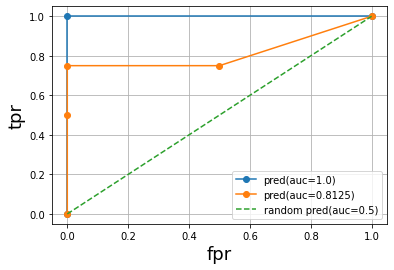

thresholds:  [1.8 0.8 0.3 0.2 0.1]


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


y_true = [1, 0, 1, 1, 0, 1]
y_prob = [0.1, 0.2, 0.8, 0.8, 0.1, 0.3]


# fpr(偽陽性率): 負例の内、誤って正例と予測した負例の確率 (FP / (FP + TN))
# tpr(真陽性率): 正例の内、正しく正例と予測した正例の確率 (TP / (TP + FN))

# 完全な予測(auc=1.0)を行った場合
fpr, tpr, thresholds = roc_curve(y_true, y_true)
auc1 = roc_auc_score(y_true, y_true)
plt.plot(fpr, tpr, marker='o', label='pred(auc=%.1f)' % auc1)


fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc2 = roc_auc_score(y_true, y_prob)
plt.plot(fpr, tpr, marker='o', label='pred(auc=%.4f)' % auc2)
x = np.linspace(0, 1, 10)
plt.plot(x, x, linestyle="dashed", label='random pred(auc=0.5)')
plt.xlabel('fpr', fontsize=18)
plt.ylabel('tpr', fontsize=18)
plt.legend()
plt.grid()
plt.show()
print('thresholds: ', thresholds)

最初の点を左下(0.0, 0.0)とし、閾値を徐々に低くしていくと、正例と予測されるレコードが増えていく。

それらのレコードにtpがあれば上に進み、fpがあれば左に進む。最終的に右上(1.0, 1.0)へたどり着く。

In [3]:
# AUCは各レコードの大小関係のみが影響する
y_true = [0, 1, 1, 0]
y_prob = [0.1, 0.3, 0.9, 0.7]
print('roc_auc_score: ', roc_auc_score(y_true, y_prob))

y_prob = [0.01, 0.03, 0.09, 0.07]
print('roc_auc_score: ', roc_auc_score(y_true, y_prob))

roc_auc_score:  0.75
roc_auc_score:  0.75


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X = cancer.data; y = cancer.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
ssc = StandardScaler()
train_x = ssc.fit_transform(train_x)
test_x = ssc.transform(test_x)


clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(train_x, train_y)
clf_prob = clf.predict_proba(test_x)[:, 1]
print('clf score: ', roc_auc_score(test_y, clf_prob))

clf score:  0.9574189321978381


# 多クラス分類における評価指標

## multi-class accuracy

・二値分類のaccuracyを多クラスへ拡張したもの。

In [5]:
from sklearn.metrics import accuracy_score

y_true = [1, 0, 2, 0, 1, 2, 1, 2]
y_pred = [1, 1, 2, 0, 1, 2, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.625


## multi-class logloss

$$
\large multiclass\hspace{1mm} logloss = -\frac{1}{N}\sum_{i=1}^{N}\sum_{m=1}^{M}y_{i,m}\log p_{i,m}
$$

$M:$クラス数。

${y}_{i,m}:$レコード$i$がクラス$m$に属する場合は1で、属さない場合は0になる。

${p}_{i,m}:$レコード$i$がクラス$m$に属する予測確率。

・二値分類のloglossを多クラスへ拡張したもの。

・評価指標への入力は、レコード数×クラス数の行列。

・ペナルティはlogloss同様。

・各レコードにおける、クラス別の予測確率合計は1になる必要がある。

In [6]:
y_true = np.array([0, 2, 1, 2, 2])
y_prob = np.array([[0.68, 0.32, 0.00],
                   [0.00, 0.00, 1.00],
                   [0.60, 0.40, 0.00],
                   [0.00, 0.00, 1.00],
                   [0.28, 0.12, 0.60]])

logloss = log_loss(y_true, y_prob)
print(logloss)

0.3625557672904274


## mean-F1, macro-F1, micro-F1

・F1-scoreを多クラスへ拡張したもの。

・主にマルチラベル分類タスクで用いられる。

マルチラベル分類：各レコードに対して、１つ、または複数のラベルが割り当てられる分類。

### mean-F1

レコード単位でF1スコアを計算し、平均をとる。

### macro-F1

各クラスごとのF1スコアを計算し、その平均をとる。

### micro-F1

レコード×クラスの行列に対して、TP, TN, FP, FN のどれに当てはまるかカウントし、それを元にしたconfusion matrixからF値を計算。


In [7]:
from sklearn.metrics import f1_score

                  # 1  2  3
y_true = np.array([[1, 1, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [0, 1, 1],
                   [0, 0, 1]])

                  # 1  2  3
y_pred = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]])

print('mean_f1: ', f1_score(y_true, y_pred, average='samples'))
print('macro_f1: ', f1_score(y_true, y_pred, average='macro'))
print('micro_f1: ', f1_score(y_true, y_pred, average='micro'))

mean_f1:  0.5933333333333334
macro_f1:  0.5523809523809523
micro_f1:  0.6250000000000001


## quadratic weighted kappa

$$
\large k = 1-\frac{\sum_{i,j}w_{i,j}O_{i,j}}{\sum_{i,j}w_{i,j}E_{i,j}}
$$

$i$は真の値のクラス。$j$は予測値のレコード数。

$O{i,j}:$ 多クラスのconfusion matrix$(i,j)$。<br>

$E{i,j}:$ $i,j$の分布が互いに独立(すなわち無相関)であるとした場合、

真の値がで$i$ある確率 * 予測値が$j$である割合 * データ全体の割合 から計算される、

confusion matrixの各セル$(i,j)$に属するレコード数の期待値。<br>

$w{i,j}:$ $(i,j)$の二乗誤差。予測値が大きく外せば、ペナルティになる。　


・クラス間に順序関係がある場合（例: アンケートのレーティング）使用される。

・完全な予測を行った場合は1、ランダムな予測を行った場合は0、ランダムより悪い予測を行った場合は負の値になる。

・予測値の各クラスの割合により分母の値が変わる為、予測値を変えたときの動きが理解しづらい。

In [8]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

def quadratic_weighted_kappa(c_matrix):
    numer = 0.0
    denom = 0.0
    
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[1]):
            n = c_matrix.shape[0]
            wij = ((i - j) ** 2.0)
            oij = c_matrix[i, j]
            eij = c_matrix[i, :].sum() * c_matrix[:, j].sum() / c_matrix.sum()
            numer += wij * oij
            denom += wij * eij
            
    return 1.0 - numer / denom


y_true = [1, 2, 3, 4, 3]
y_pred = [2, 2, 4, 4, 5]

# 真の値と予測値から、confusion matrix生成。
c_matrix = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])

kappa = quadratic_weighted_kappa(c_matrix)
print('kappa', kappa)

#scikit-learn使用例
kappa = cohen_kappa_score(y_true, y_pred, weights='quadratic')
print('sk-kappa', kappa)

kappa 0.6153846153846154
sk-kappa 0.6153846153846154
